Practice Activity

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.linear_model import Ridge, Lasso, ElasticNet 

14.2

Make a pipeline that uses all the variables in the Ames dataset, and then fits Ridge Regression with 
.

Cross-validate this pipeline and compare the results to the ordinary linear regression.

Then fit the model on the whole dataset and get the coefficients. Make a plot of these coefficients compared to the ones from ordinary linear regression.

In [2]:
ames = pd.read_csv("C:/Users/jonat/Documents/Calpoly MSBA/Fall/Machine Learning 544/Data/AmesHousing.csv")

good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

ames = ames.dropna()
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


In [3]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

In [4]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([0.89727873, 0.91038253, 0.78900365, 0.77208628, 0.9006982 ])

In [5]:
lr_pipeline_1_fitted = lr_pipeline_1.fit(X, y)

lr_pipeline_1_fitted

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000146D75A9400>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000146D5199310>)])),
                ('linear_regression', LinearRegression())])

In [6]:
ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha=1))]
)

In [7]:
cross_val_score(ridge_pipeline, X, y, cv = 5, scoring = 'r2')

array([0.89815807, 0.91744024, 0.79493606, 0.78522563, 0.91389818])

In [8]:
ridge_pipeline_fitted = ridge_pipeline.fit(X, y)

ridge_pipeline_fitted

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000146D75A9400>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000146D5199310>)])),
                ('ridge_regression', Ridge(alpha=1))])

In [9]:
coef_compare = pd.DataFrame()

coef_compare["linear"] = lr_pipeline_1_fitted.named_steps['linear_regression'].coef_
coef_compare["ridge"] = ridge_pipeline_fitted.named_steps['ridge_regression'].coef_
coef_compare["diff"] = coef_compare["linear"] - coef_compare["ridge"]

<Axes: xlabel='linear', ylabel='ridge'>

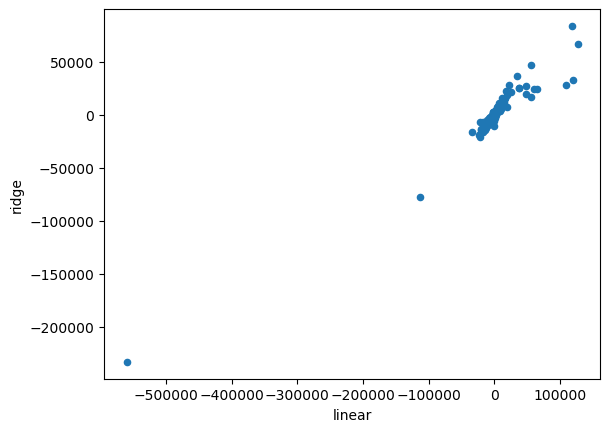

In [10]:
coef_compare.plot.scatter(x="linear", y = "ridge")

14.2.1

Using the same pipeline as previously, perform tuning on 
.

You should always try 
 values on a log scale; that is, don’t use [1,2,3,4]; instead use something like [0.001, 0.01, 0.1, 1, 10]

In [11]:
ridge_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge())]
).set_output(transform="pandas")

alphas = {'ridge_regression__alpha': np.array([0.001,0.01,0.1,1,10])}

gscv_ridge = GridSearchCV(ridge_pipeline_1, param_grid=alphas, cv = 5, scoring='r2')

In [12]:
gscv_fitted_ridge = gscv_ridge.fit(X, y)

df_cv_results_ = pd.DataFrame(gscv_fitted_ridge.cv_results_)
df_cv_results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge_regression__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.049649,0.002556,0.020207,0.002263,0.001,{'ridge_regression__alpha': 0.001},0.897285,0.910406,0.789016,0.772132,0.900762,0.853920,0.060278,5
1,0.050317,0.001890,0.021245,0.001650,0.010,{'ridge_regression__alpha': 0.01},0.897343,0.910614,0.789126,0.772532,0.901317,0.854186,0.060280,4
2,0.053322,0.005490,0.020332,0.001166,0.100,{'ridge_regression__alpha': 0.1},0.897744,0.912306,0.790110,0.775764,0.905587,0.856302,0.060250,3
3,0.053265,0.002759,0.022001,0.001463,1.000,{'ridge_regression__alpha': 1.0},0.898158,0.917440,0.794936,0.785226,0.913898,0.861932,0.059104,2
4,0.049107,0.001996,0.019240,0.000471,10.000,{'ridge_regression__alpha': 10.0},0.897762,0.920812,0.800572,0.787120,0.915095,0.864272,0.058157,1


14.3.1 

Create a LASSO pipeline, and tune lambda.

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS

In [13]:
lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(alpha=1))]
)

In [14]:
cross_val_score(lasso_pipeline, X, y, cv = 5, scoring = 'r2')

C:\Users\jonat\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+10, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


array([0.89774385, 0.91093785, 0.79691806, 0.77426245, 0.90589888])

In [15]:
lasso_pipeline_fitted = lasso_pipeline.fit(X, y)
lasso_pipeline_fitted

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000146D75A9400>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000146D5199310>)])),
                ('lasso_regression', Lasso(alpha=1))])

<Axes: xlabel='ridge', ylabel='lasso'>

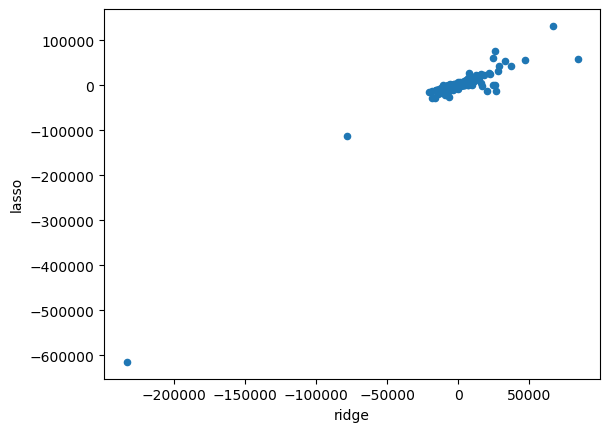

In [16]:
coef_compare["lasso"] = lasso_pipeline_fitted.named_steps['lasso_regression'].coef_
coef_compare["lasso_diff"] = coef_compare["ridge"] - coef_compare["lasso"]

coef_compare.plot.scatter(x="ridge", y = "lasso")

In [17]:
lasso_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso())]
).set_output(transform="pandas")

alphas = {'lasso_regression__alpha': np.array([101,100, 10, 1, 0.1, 0.01])}

gscv_lasso = GridSearchCV(lasso_pipeline_1, param_grid=alphas, cv = 5, scoring='r2')

In [18]:
gscv_fitted_lasso = gscv_lasso.fit(X, y)

df_cv_results_ = pd.DataFrame(gscv_fitted_lasso.cv_results_)

df_cv_results_.sort_values("rank_test_score")

C:\Users\jonat\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+10, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\jonat\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.236e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\jonat\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e+11, toleranc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso_regression__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.156849,0.010052,0.020272,0.000594,101.00,{'lasso_regression__alpha': 101.0},0.901769,0.924393,0.805402,0.783557,0.919540,0.866932,0.060034,1
1,0.150951,0.006048,0.019422,0.000610,100.00,{'lasso_regression__alpha': 100.0},0.901800,0.924433,0.805390,0.783485,0.919547,0.866931,0.060069,2
2,0.195817,0.073684,0.022023,0.002391,10.00,{'lasso_regression__alpha': 10.0},0.900776,0.915067,0.801420,0.776649,0.909250,0.860632,0.059157,3
3,0.491706,0.062109,0.019387,0.000574,1.00,{'lasso_regression__alpha': 1.0},0.897744,0.910938,0.796918,0.774262,0.905899,0.857152,0.059018,4
4,0.622129,0.126974,0.018964,0.000550,0.10,{'lasso_regression__alpha': 0.1},0.897258,0.910451,0.795951,0.774072,0.905360,0.856618,0.059025,5
5,0.612189,0.054355,0.022326,0.002710,0.01,{'lasso_regression__alpha': 0.01},0.897206,0.910401,0.790859,0.774060,0.905502,0.855606,0.060107,6


14.3.3

Create an Elastic Net pipeline, and tune lambda and alpha.

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS.

In [19]:
elastic_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", ElasticNet(alpha=1, l1_ratio=0.5))]
)

In [20]:
cross_val_score(elastic_pipeline, X, y, cv = 5, scoring = 'r2')

array([0.84843362, 0.89484602, 0.78295991, 0.74618167, 0.88108029])

In [21]:
elastic_pipeline_fitted = elastic_pipeline.fit(X, y)
elastic_pipeline_fitted

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000146D75A9400>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000146D5199310>)])),
                ('elastic_net', ElasticNet(alpha=1))])

In [38]:
elastic_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", ElasticNet())]
).set_output(transform="pandas")

param_grid = {
    "elastic_net__alpha": [1, 10, 100],
    "elastic_net__l1_ratio": np.arange(0.0, 1.2, 0.2),
}

gscv_elastic = GridSearchCV(elastic_pipeline_1, param_grid=param_grid, cv = 5, scoring='r2')

In [39]:
gscv_fitted_elastic = gscv_elastic.fit(X, y)

df_cv_results_ = pd.DataFrame(gscv_fitted_elastic.cv_results_)

df_cv_results_.sort_values("rank_test_score")

C:\Users\jonat\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e+12, tolerance: 1.348e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jonat\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.089e+12, tolerance: 1.474e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elastic_net__alpha,param_elastic_net__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.144100,0.006913,0.019076,0.000543,100,1.0,"{'elastic_net__alpha': 100, 'elastic_net__l1_r...",0.901800,0.924433,0.805390,0.783485,0.919547,0.866931,0.060069,1
11,0.171755,0.067394,0.020566,0.001109,10,1.0,"{'elastic_net__alpha': 10, 'elastic_net__l1_ra...",0.900776,0.915067,0.801420,0.776649,0.909250,0.860632,0.059157,2
5,0.500076,0.078630,0.021425,0.002433,1,1.0,"{'elastic_net__alpha': 1, 'elastic_net__l1_rat...",0.897744,0.910938,0.796918,0.774262,0.905899,0.857152,0.059018,3
4,0.080190,0.001953,0.020593,0.001136,1,0.8,"{'elastic_net__alpha': 1, 'elastic_net__l1_rat...",0.869985,0.910922,0.786466,0.756417,0.899221,0.844602,0.061939,4
3,0.072675,0.004292,0.021249,0.001252,1,0.6,"{'elastic_net__alpha': 1, 'elastic_net__l1_rat...",0.854984,0.899709,0.784092,0.748899,0.886498,0.834836,0.058726,5
2,0.067890,0.001420,0.019982,0.000739,1,0.4,"{'elastic_net__alpha': 1, 'elastic_net__l1_rat...",0.842222,0.890269,0.781719,0.743712,0.876022,0.826789,0.055902,6
1,0.070916,0.005040,0.022692,0.003286,1,0.2,"{'elastic_net__alpha': 1, 'elastic_net__l1_rat...",0.830470,0.881659,0.778866,0.739074,0.866618,0.819337,0.053523,7
0,0.665115,0.092909,0.023590,0.002283,1,0.0,"{'elastic_net__alpha': 1, 'elastic_net__l1_rat...",0.819310,0.873470,0.775538,0.734519,0.857822,0.812132,0.051506,8
10,0.053386,0.001450,0.019429,0.000403,10,0.8,"{'elastic_net__alpha': 10, 'elastic_net__l1_ra...",0.767995,0.834319,0.753485,0.709800,0.817294,0.776579,0.044851,9
9,0.050040,0.000604,0.019854,0.000761,10,0.6,"{'elastic_net__alpha': 10, 'elastic_net__l1_ra...",0.679356,0.759111,0.697470,0.654039,0.742257,0.706446,0.039030,10


<Axes: xlabel='ridge', ylabel='elastic'>

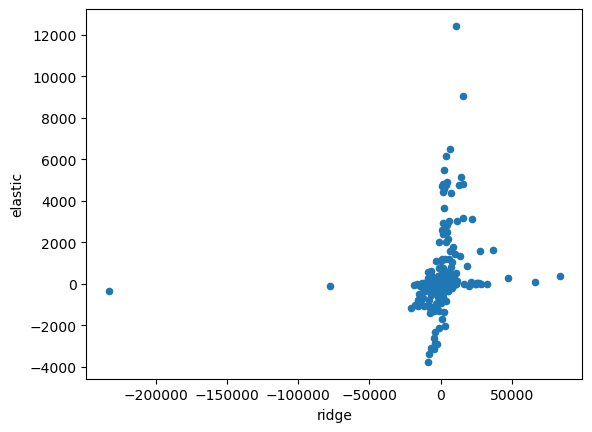

In [40]:
# Elastic Coeffiencts vs Ridge.
coef_compare["elastic"] = elastic_pipeline_fitted.named_steps['elastic_net'].coef_
coef_compare["elsatic_diff"] = coef_compare["elastic"] - coef_compare["ridge"]

coef_compare.plot.scatter(x="ridge", y = "elastic")

<Axes: xlabel='actual', ylabel='predicted'>

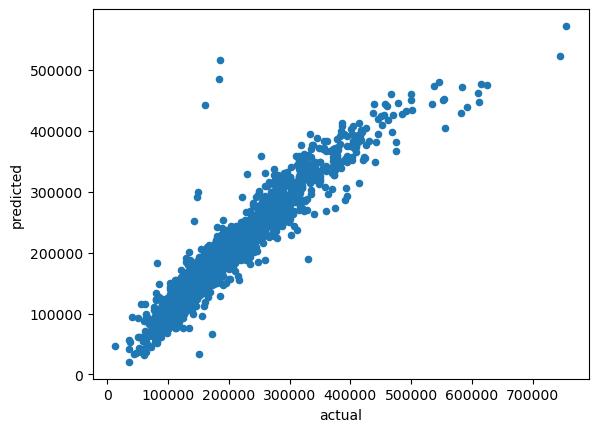

In [41]:
# Elastic for OLS
elastic_pred = (gscv_fitted_elastic.predict(X))

target = pd.DataFrame()

target["actual"] = y
target["predicted"] = elastic_pred

target.plot.scatter(x = "actual", y = "predicted")